# 상가 상권 분석

## lib load

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

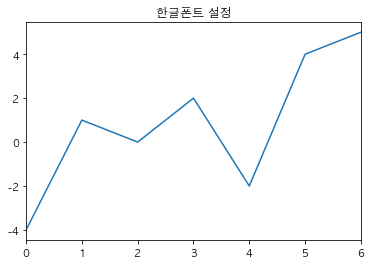

In [13]:
pd.Series([-4,1,0,2,-2,4,5]).plot(title='한글폰트 설정')

In [15]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

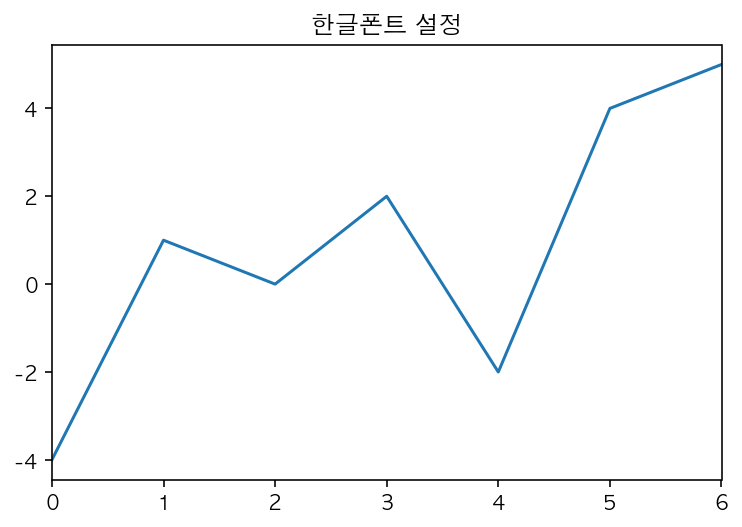

In [16]:
pd.Series([-4,1,0,2,-2,4,5]).plot(title='한글폰트 설정')

## file load

In [18]:
# 파일 확인
%ls data

전국평균분양가격_201309_201508.csv
전국평균분양가격_201912.csv
상가업소정보_201912_01.csv


In [24]:
# csv file load
df = pd.read_csv('data/상가업소정보_201912_01.csv', sep='|')
df.shape

(573680, 39)

## 데이터 전처리를 위한 데이터 분석

In [25]:
# 모든 columns를 확인한다.
pd.options.display.max_columns = 39

In [26]:
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,기타 주점업,11,서울특별시,11680,강남구,1168060000,대치1동,1168010600,대치동,1168010600206040000,1,대지,604,NaN,서울특별시 강남구 대치동 604,116802000003,서울특별시 강남구 남부순환로,2933,NaN,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,비알콜 음료점업,11,서울특별시,11680,강남구,1168064000,역삼1동,1168010100,역삼동,1168010100206960042,1,대지,696,42.0,서울특별시 강남구 역삼동 696-42,116804166502,서울특별시 강남구 선릉로93길,6,NaN,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,기타 주점업,11,서울특별시,11545,금천구,1154563000,독산3동,1154510200,독산동,1154510200201620001,1,대지,162,1.0,서울특별시 금천구 독산동 162-1,115453117003,서울특별시 금천구 가산로,34,6.0,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
3,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,"피자, 햄버거, 샌드위치 및 유사 음식점업",26,부산광역시,26530,사상구,2653062000,괘법동,2653010400,괘법동,2653010400205780000,1,대지,578,NaN,부산광역시 사상구 괘법동 578,265303139004,부산광역시 사상구 괘감로,37,NaN,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1,26,128.980455,35.159774
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,욕탕업,11,서울특별시,11710,송파구,1171060000,석촌동,1171010500,석촌동,1171010500202560000,1,대지,256,NaN,서울특별시 송파구 석촌동 256,117103123001,서울특별시 송파구 가락로,71,NaN,1171010500102560005010490,NaN,서울특별시 송파구 가락로 71,138846,5690.0,NaN,1,NaN,127.104071,37.500249


In [27]:
#index 정보 보기
df.index

RangeIndex(start=0, stop=573680, step=1)

In [28]:
# columns 정보 보기
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [29]:
# info
3#df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
상가업소번호       573680 non-null int64
상호명          573679 non-null object
지점명          76674 non-null object
상권업종대분류코드    573680 non-null object
상권업종대분류명     573680 non-null object
상권업종중분류코드    573680 non-null object
상권업종중분류명     573680 non-null object
상권업종소분류코드    573680 non-null object
상권업종소분류명     573680 non-null object
표준산업분류코드     539290 non-null object
표준산업분류명      539290 non-null object
시도코드         573680 non-null int64
시도명          573680 non-null object
시군구코드        573680 non-null int64
시군구명         573680 non-null object
행정동코드        573680 non-null int64
행정동명         573680 non-null object
법정동코드        573680 non-null int64
법정동명         573680 non-null object
지번코드         573680 non-null int64
대지구분코드       573680 non-null int64
대지구분명        573680 non-null object
지번본번지        573680 non-null int64
지번부번지        474924 non-null float64
지번주소         573680 non-null obje

In [31]:
# type 정보 보기
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드           int64
시도명           object
시군구코드          int64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드          int64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호          int64
신우편번호        float64
동정보           object
층정보           object
호정보           object
경도           float64
위도           float64
dtype: object

In [32]:
# 결측치 확인
df.isnull()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,True,False,False
2,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False
3,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573675,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,True,True,False,False
573676,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False
573677,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False
573678,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False


In [35]:
n = df.isnull().sum()

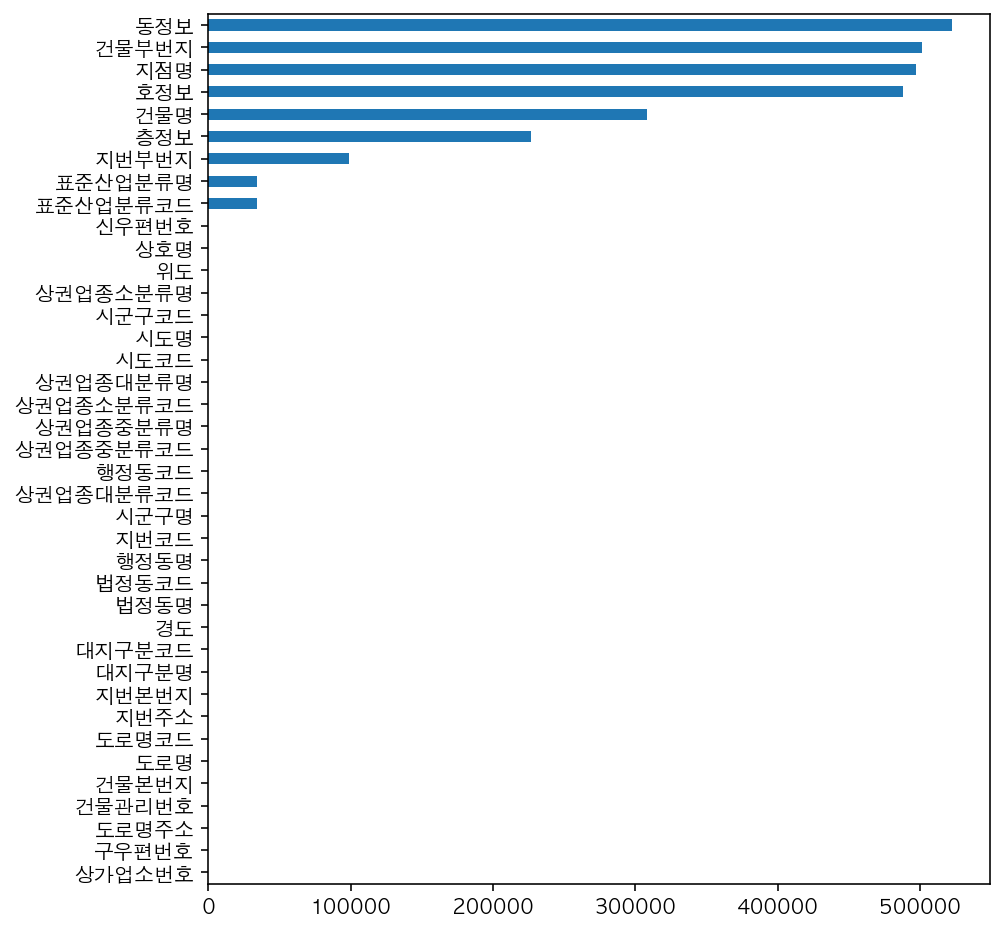

In [44]:
# 결측치 시각화
n.sort_values().plot.barh(figsize=(7,8))

In [46]:
# missingno로 결측치 시각화하기
# 별도의 설치 필요
# terminal에서 conda install -c conda-forge missingno 명령어로 설치
import missingno as msno

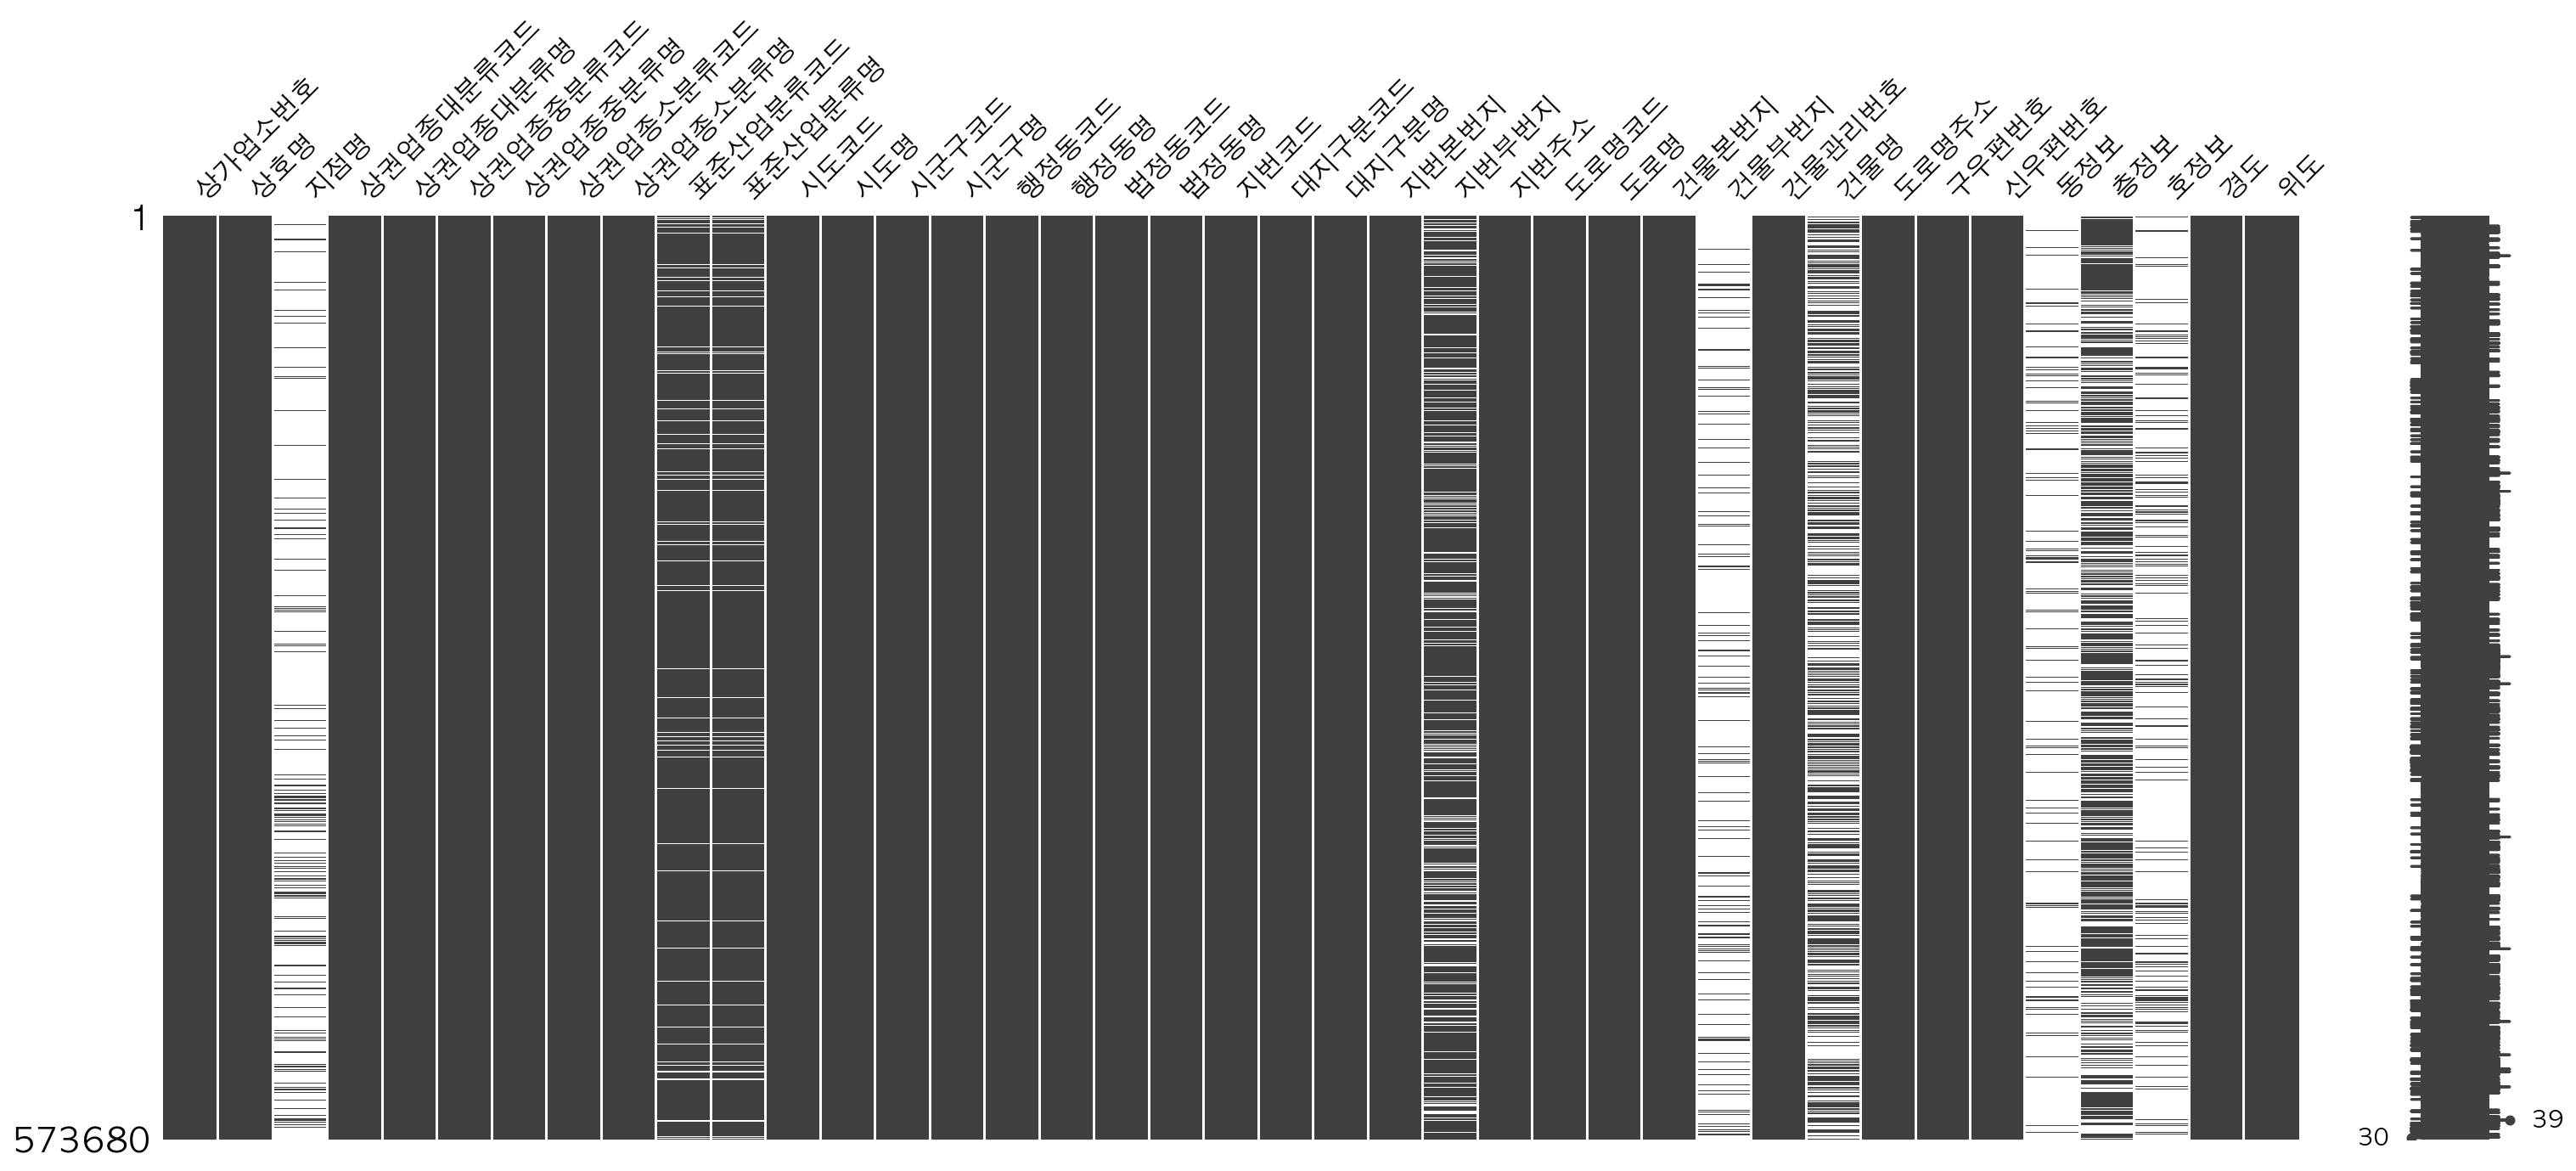

In [47]:
msno.matrix(df)

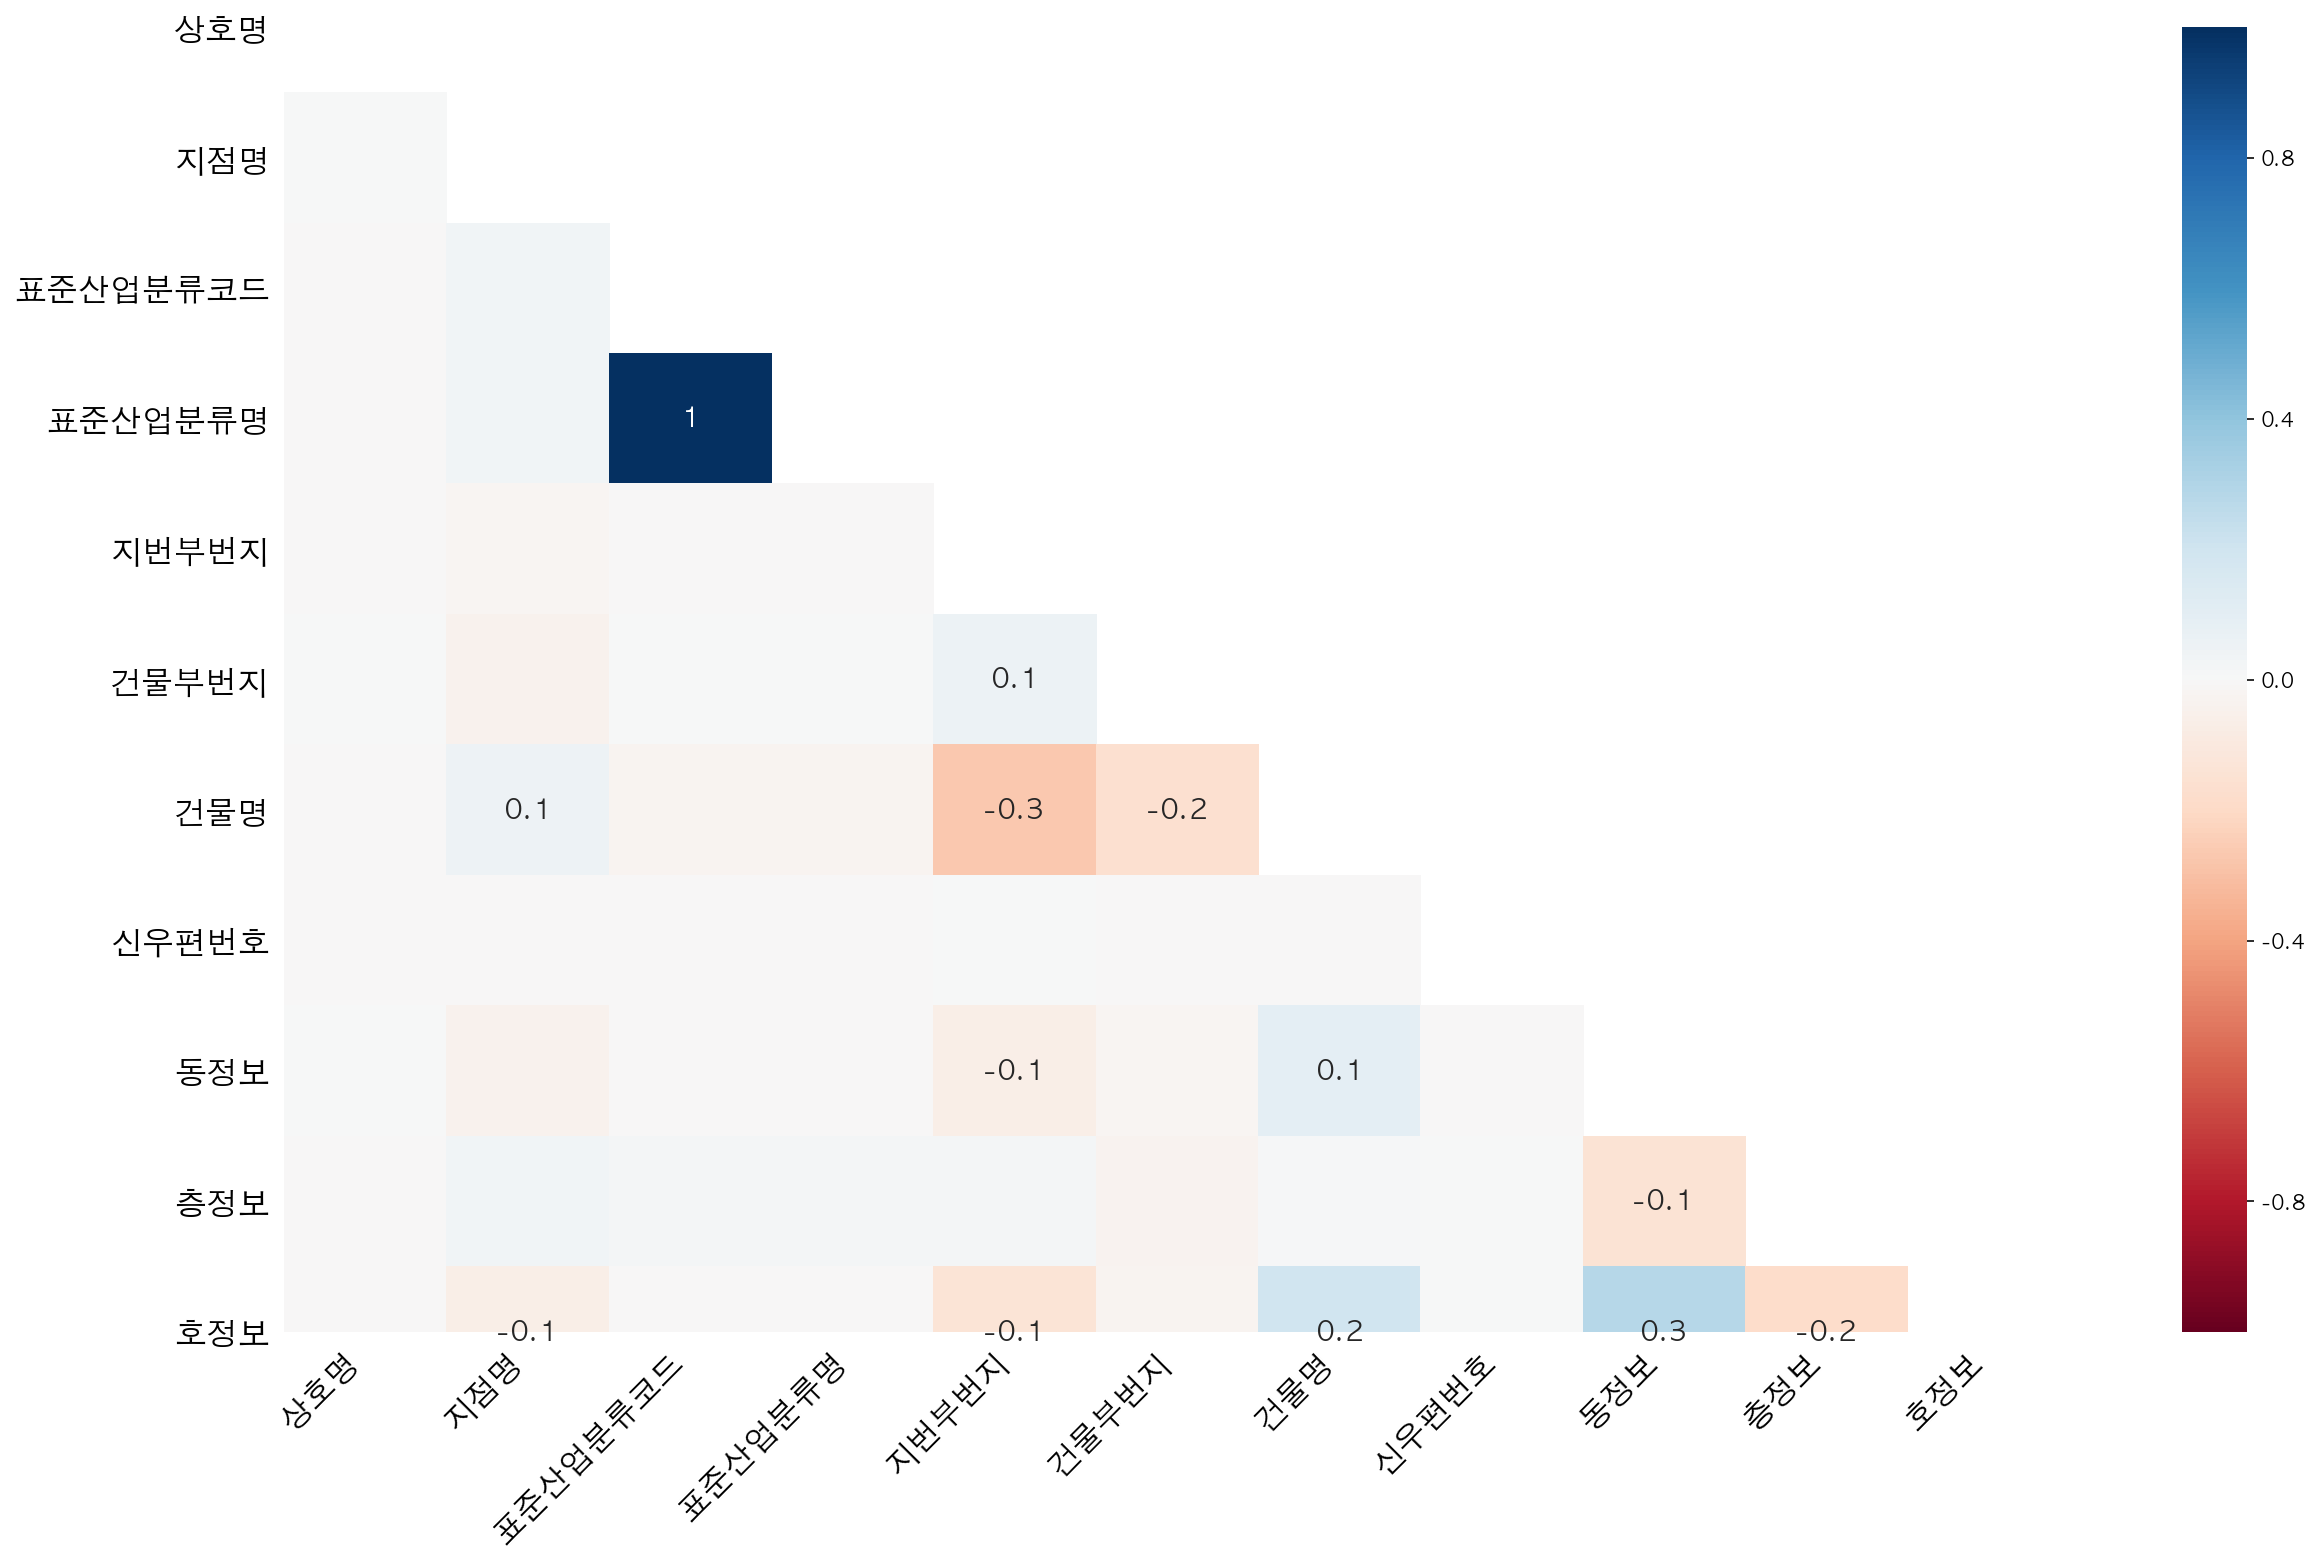

In [48]:
# heatmap으로 표현
# 1에 가까울수록 상관관계가 높다고 본다.
msno.heatmap(df)

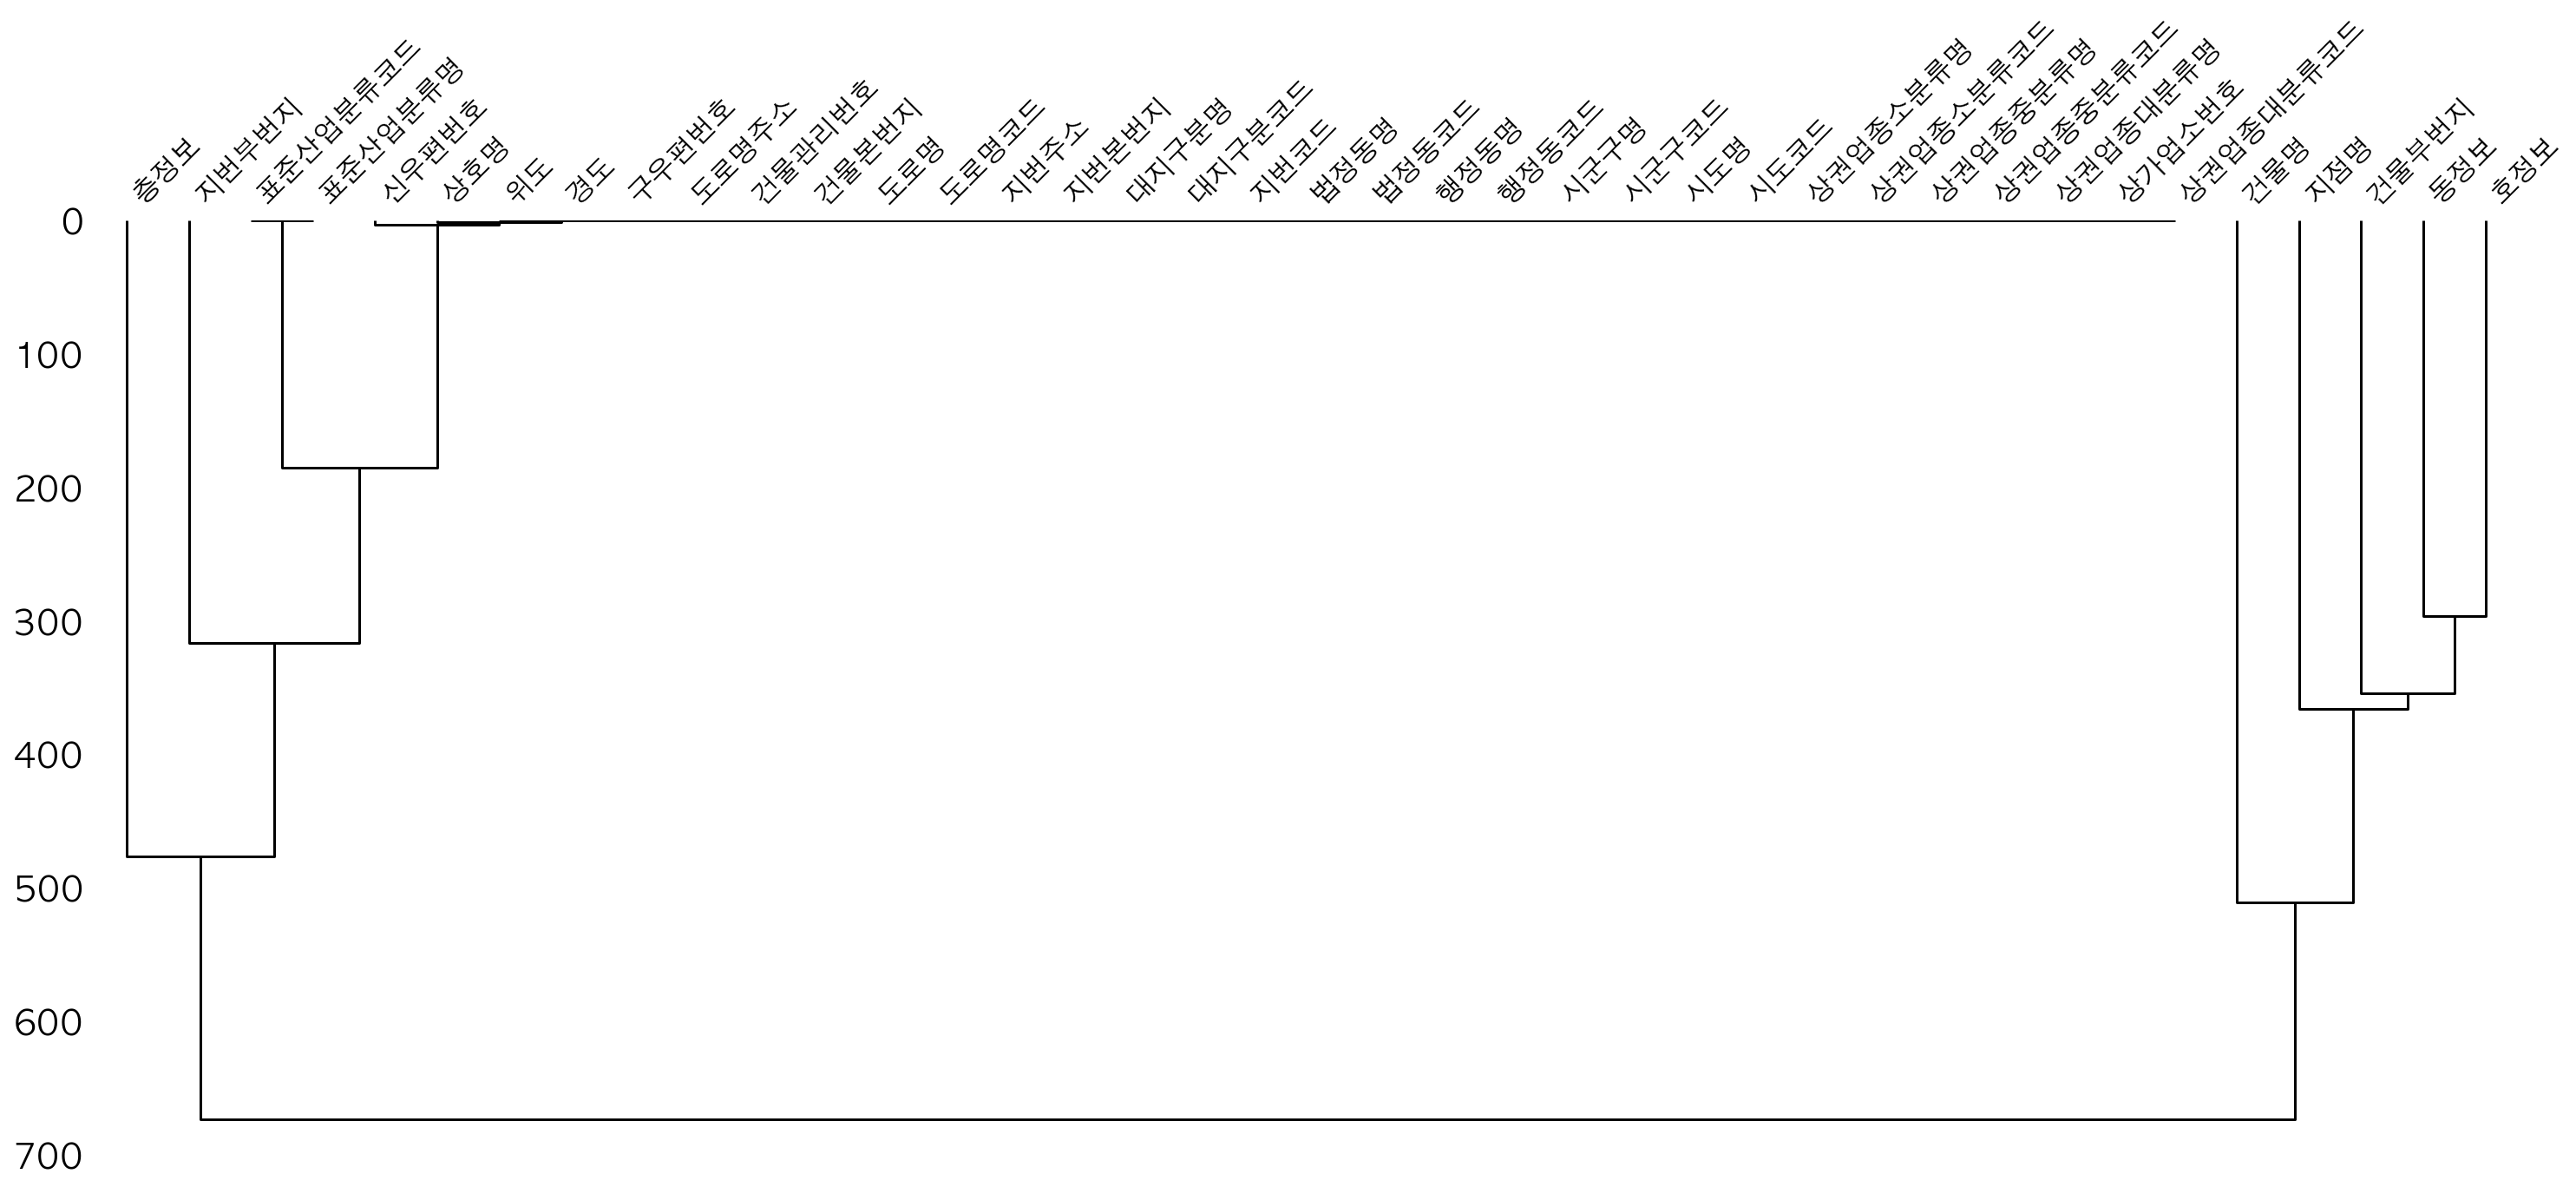

In [49]:
# 상관관계를 알아볼 수 있다.
msno.dendrogram(df)

### 결측치 제거

In [57]:
not_use = n.sort_values(ascending=False).head(9)
not_use_col = not_use.index
not_use_col

Index(['동정보', '건물부번지', '지점명', '호정보', '건물명', '층정보', '지번부번지', '표준산업분류명',
       '표준산업분류코드'],
      dtype='object')

In [62]:
# not_use_col에서 조회되는 컬럼(결측치가 많은 순서로 추출했을 때 상위 10개 항목)을 삭제한다.
# axis = 0 이면 행을 기준으로 한다. 1이면 열을 기준으로 한다.
# 여기서는 열을 기준으로 not_use_col을 조회할 것이므로 axis=1로 설정한다.
df = df.drop(not_use_col, axis = 1)

KeyError: "['동정보' '건물부번지' '지점명' '호정보' '건물명' '층정보' '지번부번지' '표준산업분류명' '표준산업분류코드'] not found in axis"

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 30 columns):
상가업소번호       573680 non-null int64
상호명          573679 non-null object
상권업종대분류코드    573680 non-null object
상권업종대분류명     573680 non-null object
상권업종중분류코드    573680 non-null object
상권업종중분류명     573680 non-null object
상권업종소분류코드    573680 non-null object
상권업종소분류명     573680 non-null object
시도코드         573680 non-null int64
시도명          573680 non-null object
시군구코드        573680 non-null int64
시군구명         573680 non-null object
행정동코드        573680 non-null int64
행정동명         573680 non-null object
법정동코드        573680 non-null int64
법정동명         573680 non-null object
지번코드         573680 non-null int64
대지구분코드       573680 non-null int64
대지구분명        573680 non-null object
지번본번지        573680 non-null int64
지번주소         573680 non-null object
도로명코드        573680 non-null int64
도로명          573680 non-null object
건물본번지        573680 non-null int64
건물관리번호       573680 non-null object

In [68]:
# 사용하지 않는 columns 제거하기
# 코드, 번호로 구성된 columns는 사용하지 않을 것이므로 삭제한다.
cols = df.columns
cols_code = cols[cols.str.contains('코드|번호')]
cols_code

Index(['상가업소번호', '상권업종대분류코드', '상권업종중분류코드', '상권업종소분류코드', '시도코드', '시군구코드',
       '행정동코드', '법정동코드', '지번코드', '대지구분코드', '도로명코드', '건물관리번호', '구우편번호',
       '신우편번호'],
      dtype='object')

In [72]:
df = df.drop(cols_code,axis = 1)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 16 columns):
상호명         573679 non-null object
상권업종대분류명    573680 non-null object
상권업종중분류명    573680 non-null object
상권업종소분류명    573680 non-null object
시도명         573680 non-null object
시군구명        573680 non-null object
행정동명        573680 non-null object
법정동명        573680 non-null object
대지구분명       573680 non-null object
지번본번지       573680 non-null int64
지번주소        573680 non-null object
도로명         573680 non-null object
건물본번지       573680 non-null int64
도로명주소       573680 non-null object
경도          573680 non-null float64
위도          573680 non-null float64
dtypes: float64(2), int64(2), object(12)
memory usage: 70.0+ MB


### 행, 열을 기준으로 값을 가지고 오기

In [74]:
# 상호명 col만 가지고 온다.
df['상호명']

0                와라와라호프
1         커피빈코리아선릉로93길점
2                  프로포즈
3              싱싱커피&토스트
4              가락사우나내스낵
              ...      
573675          비파티세리공덕
573676            앤탑PC방
573677         오즈아레나PC방
573678           파인트리네일
573679           마이리틀네일
Name: 상호명, Length: 573680, dtype: object

In [77]:
# 상호명, 도로명주소 col만 가지고 온다.
# 두개 이상의 컬럼의 값을 가지고 올떄는 list 형태로 가지고 와야 한다.
df[['상호명','도로명주소']]

,상호명,도로명주소
0,와라와라호프,서울특별시 강남구 남부순환로 2933
1,커피빈코리아선릉로93길점,서울특별시 강남구 선릉로93길 6
2,프로포즈,서울특별시 금천구 가산로 34-6
3,싱싱커피&토스트,부산광역시 사상구 괘감로 37
4,가락사우나내스낵,서울특별시 송파구 가락로 71
...,...,...
573675,비파티세리공덕,서울특별시 마포구 마포대로14길 4
573676,앤탑PC방,서울특별시 성동구 성수일로8길 37
573677,오즈아레나PC방,서울특별시 강남구 강남대로 492
573678,파인트리네일,서울특별시 영등포구 국제금융로 10


In [79]:
# 행을 기준으로 가지고 올때는 loc를 이용한다.
df.loc[0]

상호명                       와라와라호프
상권업종대분류명                      음식
상권업종중분류명                    유흥주점
상권업종소분류명                   호프/맥주
시도명                        서울특별시
시군구명                         강남구
행정동명                        대치1동
법정동명                         대치동
대지구분명                         대지
지번본번지                        604
지번주소           서울특별시 강남구 대치동 604
도로명              서울특별시 강남구 남부순환로
건물본번지                       2933
도로명주소       서울특별시 강남구 남부순환로 2933
경도                       127.061
위도                       37.4939
Name: 0, dtype: object

In [80]:
# 여러 행의 값을 가지고 올떄는 열에서 했던거와 같이 list 형태로 입력해야 한다.
df.loc[[0,1,2]]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,대지,604,서울특별시 강남구 대치동 604,서울특별시 강남구 남부순환로,2933,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,대지,696,서울특별시 강남구 역삼동 696-42,서울특별시 강남구 선릉로93길,6,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,대지,162,서울특별시 금천구 독산동 162-1,서울특별시 금천구 가산로,34,서울특별시 금천구 가산로 34-6,126.899220,37.471711


In [83]:
# n*n 행렬에서 값을 가지고 올때 

df.loc[0,'상호명']

'와라와라호프'

In [84]:
df.loc[[0,1,2],['상호명','도로명주소']]

,상호명,도로명주소
0,와라와라호프,서울특별시 강남구 남부순환로 2933
1,커피빈코리아선릉로93길점,서울특별시 강남구 선릉로93길 6
2,프로포즈,서울특별시 금천구 가산로 34-6


In [86]:
# iloc를 통해 슬라이싱으로 데이터를 가지고 올 수 있다.
df.iloc[:5,:5]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시
3,싱싱커피&토스트,음식,패스트푸드,토스트전문,부산광역시
4,가락사우나내스낵,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시


In [87]:
df.iloc[:]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,대지,604,서울특별시 강남구 대치동 604,서울특별시 강남구 남부순환로,2933,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,대지,696,서울특별시 강남구 역삼동 696-42,서울특별시 강남구 선릉로93길,6,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,대지,162,서울특별시 금천구 독산동 162-1,서울특별시 금천구 가산로,34,서울특별시 금천구 가산로 34-6,126.899220,37.471711
3,싱싱커피&토스트,음식,패스트푸드,토스트전문,부산광역시,사상구,괘법동,괘법동,대지,578,부산광역시 사상구 괘법동 578,부산광역시 사상구 괘감로,37,부산광역시 사상구 괘감로 37,128.980455,35.159774
4,가락사우나내스낵,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시,송파구,석촌동,석촌동,대지,256,서울특별시 송파구 석촌동 256,서울특별시 송파구 가락로,71,서울특별시 송파구 가락로 71,127.104071,37.500249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573675,비파티세리공덕,음식,한식,한식/백반/한정식,서울특별시,마포구,공덕동,공덕동,대지,105,서울특별시 마포구 공덕동 105-67,서울특별시 마포구 마포대로14길,4,서울특별시 마포구 마포대로14길 4,126.955059,37.548618
573676,앤탑PC방,관광/여가/오락,PC/오락/당구/볼링등,인터넷PC방,서울특별시,성동구,성수2가3동,성수동2가,대지,289,서울특별시 성동구 성수동2가 289-15,서울특별시 성동구 성수일로8길,37,서울특별시 성동구 성수일로8길 37,127.054615,37.545853
573677,오즈아레나PC방,관광/여가/오락,PC/오락/당구/볼링등,인터넷PC방,서울특별시,강남구,논현1동,논현동,대지,165,서울특별시 강남구 논현동 165-8,서울특별시 강남구 강남대로,492,서울특별시 강남구 강남대로 492,127.024102,37.506202
573678,파인트리네일,생활서비스,이/미용/건강,발/네일케어,서울특별시,영등포구,여의동,여의도동,대지,23,서울특별시 영등포구 여의도동 23,서울특별시 영등포구 국제금융로,10,서울특별시 영등포구 국제금융로 10,126.924863,37.525172


In [88]:
# 뒤에서 5개의 값을 가지고 온다.
df.iloc[-5:,-5:]

,도로명,건물본번지,도로명주소,경도,위도
573675,서울특별시 마포구 마포대로14길,4,서울특별시 마포구 마포대로14길 4,126.955059,37.548618
573676,서울특별시 성동구 성수일로8길,37,서울특별시 성동구 성수일로8길 37,127.054615,37.545853
573677,서울특별시 강남구 강남대로,492,서울특별시 강남구 강남대로 492,127.024102,37.506202
573678,서울특별시 영등포구 국제금융로,10,서울특별시 영등포구 국제금융로 10,126.924863,37.525172
573679,서울특별시 도봉구 도봉로114길,22,서울특별시 도봉구 도봉로114길 22-8,127.035145,37.647099


### 기술통계값보기

In [89]:
# describe로 기술통계값을 봅니다.

# DataFrame.count: Count number of non-NA/null observations.
# DataFrame.max: Maximum of the values in the object.
# DataFrame.min: Minimum of the values in the object.
# DataFrame.mean: Mean of the values.
# DataFrame.std: Standard deviation of the observations.
# DataFrame.select_dtypes: Subset of a DataFrame including/excluding
#     columns based on their dtype.


df.describe()

,지번본번지,건물본번지,경도,위도
count,573680.000000,573680.000000,573680.000000,573680.000000
mean,469.281810,153.912094,127.596287,36.854698
std,484.778049,276.980935,0.941262,1.081285
min,1.000000,0.000000,126.768169,35.006760
25%,109.000000,20.000000,126.968316,35.215422
50%,335.000000,50.000000,127.047672,37.511207
75%,678.000000,172.000000,128.986938,37.560362
max,9999.000000,3318.000000,129.292243,37.692398


In [91]:
df[['위도','경도']].describe()

,위도,경도
count,573680.000000,573680.000000
mean,36.854698,127.596287
std,1.081285,0.941262
min,35.006760,126.768169
25%,35.215422,126.968316
50%,37.511207,127.047672
75%,37.560362,128.986938
max,37.692398,129.292243


In [92]:
# 분산값을 보고 싶을 때
df['위도'].var()

1.1691762199811755

In [93]:
# 표준편차는 분산에 root를 씌운 값이다.
import numpy as np

np.sqrt(df['위도'].var())

1.0812845231395738

In [94]:
df['위도'].std()

1.0812845231395738

### 단변량 수치형 변수 시각화

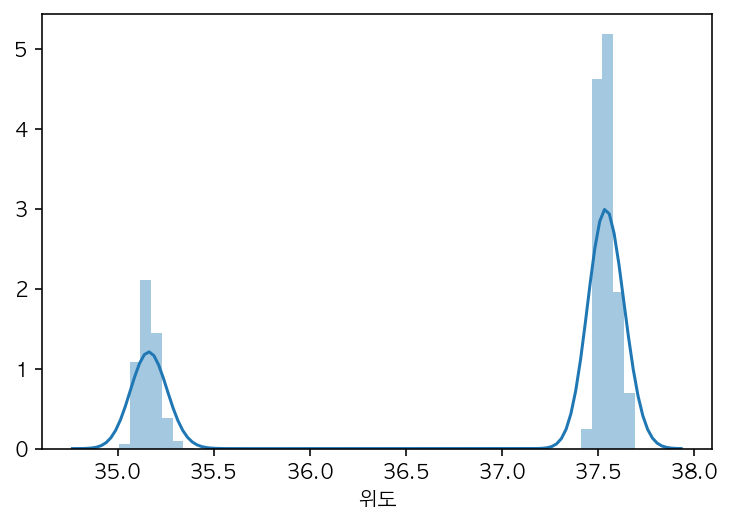

In [95]:
# 위도의 distplot을 그린다.
# y축은 빈도수를 나타낸다. 히스토그램과 비슷하다고 할 수 있다.
sns.distplot(df['위도'])

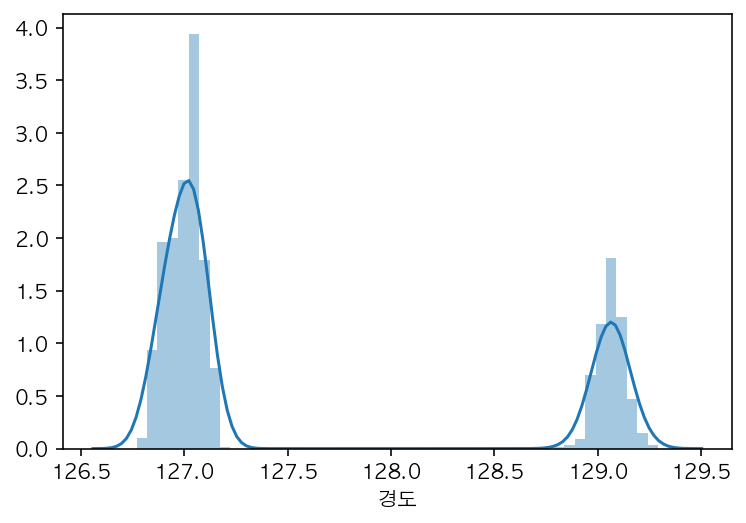

In [96]:
# 경도의 distplot을 그린다
sns.distplot(df['경도'])

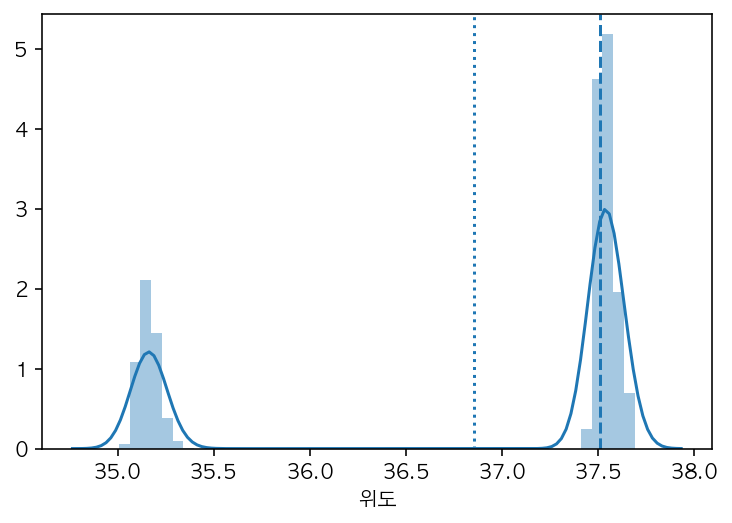

In [100]:
# 위도의 평균, 중앙값을 표현하고 color로 선의 색상을 linestyle로 점선으로 표시해 본다.
plt.axvline(df['위도'].mean(), linestyle=':')
plt.axvline(df['위도'].median(), linestyle='--')

sns.distplot(df['위도'])

### 상관계수

#### 이변량 데이터 분석

In [102]:
# 각 변수의 상관계수를 구한다.
corr = df.corr()

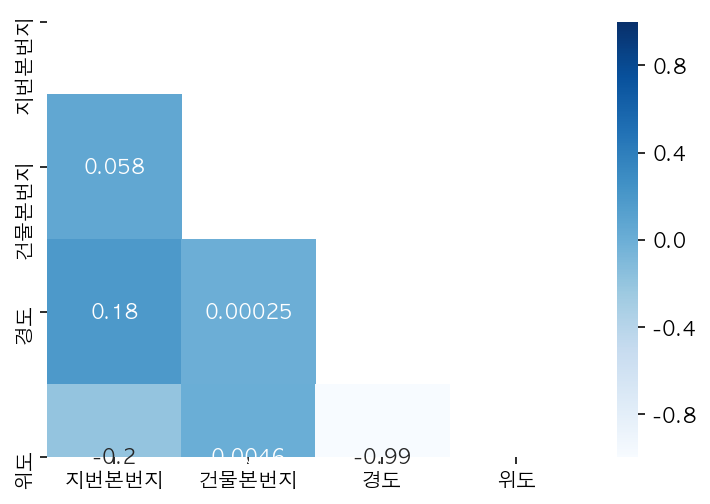

In [106]:
# 상관계수를 시각화한다.

mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, annot=True, cmap='Blues', mask=mask)

# 경도와 위도가 강한 음의 상관관계가 있음을 확인할 수 있다.

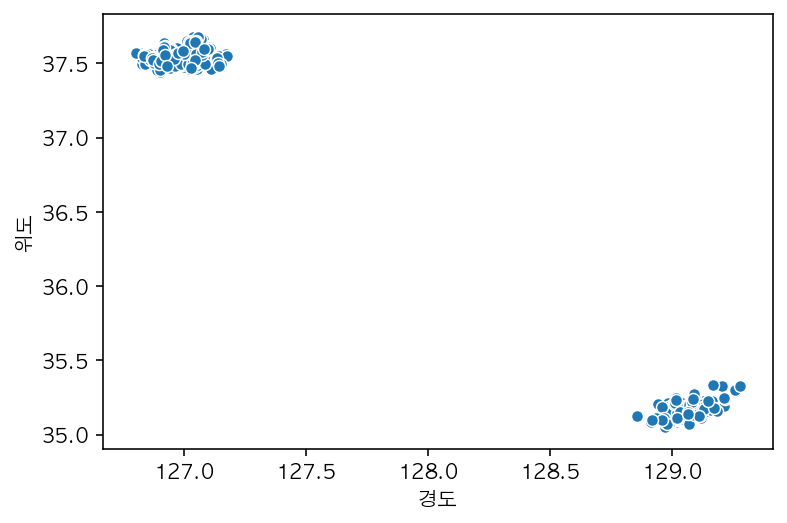

In [107]:
# scaterplot으로 경도와 위도를 표한하며, 데이터의 개수가 많으면 오래 걸리기 떄문에 1000 개의 샘플을 추출해서 그린다.
sns.scatterplot(data=df.sample(1000), x='경도', y='위도')

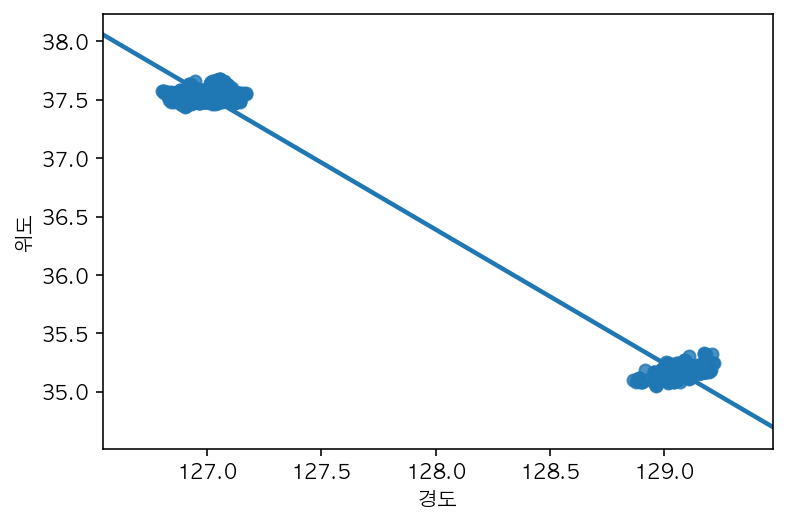

In [108]:
# 회귀선으로 상관관계를 알아본다.
sns.regplot(data=df.sample(1000), x='경도', y='위도')

#강한 음의 상관관계가 있음을 회귀선으로 다시 확인하였다.

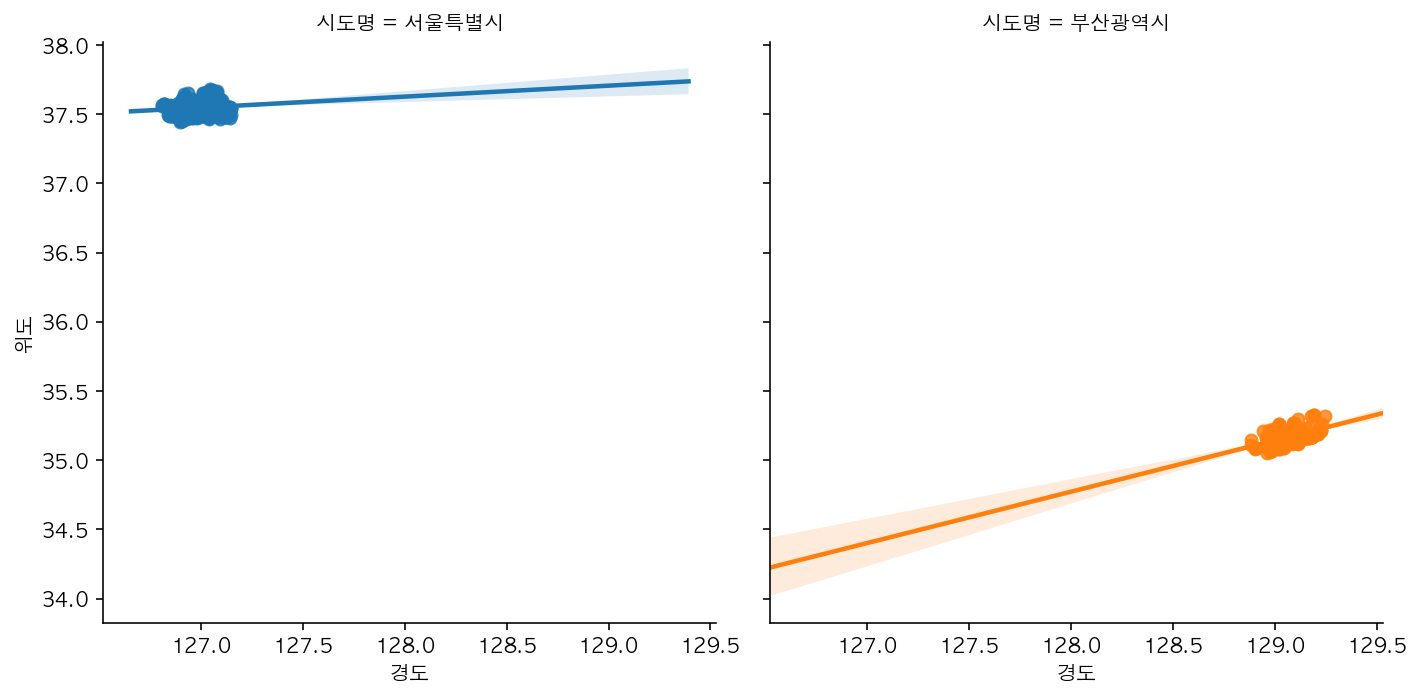

In [111]:
# 회귀선을 그리는 그래프의 서브플롯을 그립니다.

sns.lmplot(data=df.sample(1000),x='경도',y='위도', hue='시도명', col='시도명')

# 시도명으로 구분하여 봤을 때는 상관관계가 있어보이지 않는다.